In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("BASE_AMBLIPIA.csv") 

In [3]:
data.head(50)

,AFILIACION,NOMBRE,SEXO,CONSULTA,DIAGNOSTICO,SPH/OD,CILIN/OD,EJE/OD,SPH/OI,CILIN/OI,EJE/OI,CVOD,CVOI,OJAM
0,20010610639,GERINA GOMEZ TOLENTINO,F,26/06/01,AMBLIOPIA MIXTA (ESTRABICA + REFRACTIVA),0.00,0.00,0.0,-3.00,-0.25,60.0,20,400,OI
1,20010606403,ALEJANDRO ERICK MIRANDA LEON,M,02/07/01,AMBLIOPIA REFRACTIVA (ANISOMEROPICA),0.00,-1.75,165.0,0.00,-5.00,170.0,20,60,OI
2,20010610765,SAID RUBIO QUIROZ,M,03/07/01,AMBLIOPIA MIXTA (ESTRABICA + REFRACTIVA),-7.75,-2.25,0.0,-10.00,-6.00,0.0,20,200,OI
3,20010610758,VICTOR VIBANCO AVALOS,M,03/07/01,AMBLIOPIA ESTRABICA,1.50,-0.75,175.0,3.50,-1.50,130.0,20,100,OI
4,20010610748,RODRIGO GUTIERREZ HERNANDEZ,M,03/07/01,AMBLIOPIA ESTRABICA,NaN,NaN,NaN,NaN,NaN,NaN,50,200,AO
5,20010607081,MONICA TADEO PLASCENCIA,F,03/07/01,AMBLIOPIA REFRACTIVA (ANISOMEROPICA),-16.50,0.50,10.0,-7.50,-2.00,0.0,50,25,OD
6,20010501301,DOLORES ALBA ESPEJEL,F,03/07/01,AMBLIOPIA ESTRABICA,5.00,-0.50,90.0,6.50,0.00,0.0,20,50,OI
7,20010501268,MONICA SANCHEZ CORTES,F,03/07/01,AMBLIOPIA REFRACTIVA (ANISOMEROPICA),0.00,-7.00,45.0,0.00,-0.75,7.0,50,20,OD
8,20010501730,YOLANDA PANTIGA PANTIGA,F,04/07/01,AMBLIOPIA ESTRABICA,NaN,NaN,NaN,NaN,NaN,NaN,70,20,OD
9,20010615594,REYNA ANACORETA GARCIA,F,04/07/01,AMBLIOPIA MIXTA (ESTRABICA + REFRACTIVA),-1.00,-5.50,10.0,-1.50,-6.00,170.0,60,70,AO


In [4]:
data.DIAGNOSTICO.value_counts()

AMBLIOPIA REFRACTIVA (ANISOMETROPICA)       352
AMBLIOPIA REFRACTIVA                        273
AMBLIOPIA ESTRABICA                          82
AMBLIOPIA MIXTA (ESTRABICA + REFRACTIVA)     31
AMBLIOPIA REFRACTIVA (ANISOMEROPICA)         11
AMBLIOPIA REFRACTIVA                          5
AMLBIOPIA REFRACTIVA                          5
AMBLIOPIA POR DEPRIVACION                     5
AMBLIOPIA ESTRABICA                           3
AMBLIOPIA RERACTIVA                           2
AMLBIOPIA ESTRABICA                           2
AMBLIOPIA REFRACTIVA (ANISOMETRICA)           1
AMBLIOPIA MIXTA (EXANOPICA + ESTRABICA)       1
AMBIOPIA ESTRABICA                            1
Name: DIAGNOSTICO, dtype: int64

In [5]:
cl1=data[data["DIAGNOSTICO"]=="AMBLIOPIA REFRACTIVA (ANISOMETROPICA)"]
cl2=data[data["DIAGNOSTICO"]=="AMBLIOPIA REFRACTIVA"]
frames = [cl1,cl2]
data_final = pd.concat(frames)


In [6]:
data_final.DIAGNOSTICO.value_counts()

AMBLIOPIA REFRACTIVA (ANISOMETROPICA)    352
AMBLIOPIA REFRACTIVA                     273
Name: DIAGNOSTICO, dtype: int64

In [7]:
catB=data_final.values[:,4]
cat=[0]*len(catB)
for i in range(len(catB)):
    if catB[i]=='AMBLIOPIA REFRACTIVA (ANISOMETROPICA)':
        cat[i]=1

In [8]:
X = data_final.values[:,range(5,13)]
data_final.values[:,range(5,11)]

array([[-9.75, -4.75, 130.0, -0.25, 0.0, 0.0],
       [0.0, 0.0, 0.0, -8.0, -5.0, 5.0],
       [1.0, -1.0, 0.0, 4.0, -2.25, 178.0],
       ...,
       [-3.75, -3.0, 10.0, -4.25, -2.75, 170.0],
       [-18.75, -3.0, 1.0, -24.5, -3.0, 3.0],
       [-1.25, -0.75, 0.0, -1.25, -0.5, 0.0]], dtype=object)

In [9]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
pca = PCA(n_components = 3)
X_3=principalComponents = pca.fit_transform(scaled_X)

In [11]:
pca.explained_variance_ratio_

array([0.23658661, 0.16987972, 0.16225361])

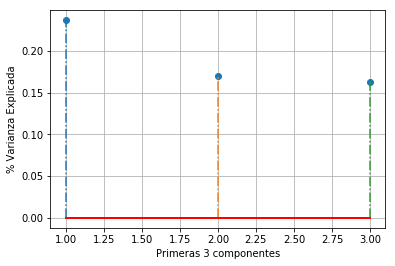

In [12]:
plt.ylabel('% Varianza Explicada')
plt.xlabel('Primeras 3 componentes')
plt.grid(True)
x = np.linspace(1, 3, 3)

markerline, stemlines, baseline = plt.stem(x, pca.explained_variance_ratio_, '-.')

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

In [13]:
np.sum(pca.explained_variance_ratio_)

0.5687199418467894

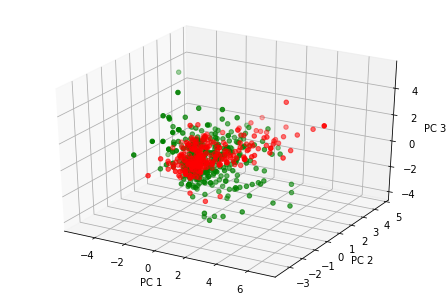

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green']
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2],c=cat, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

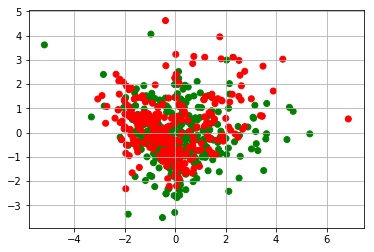

In [15]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(X_3[:,0], X_3[:,1],c=cat, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

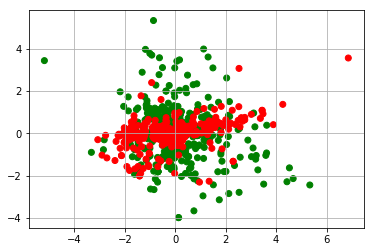

In [16]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(X_3[:,0], X_3[:,2],c=cat, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

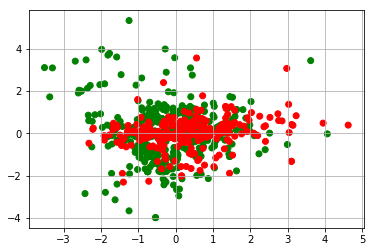

In [17]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(X_3[:,1], X_3[:,2],c=cat, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_3,cat,test_size=0.25,random_state=40)


model = LogisticRegression(solver='lbfgs',max_iter=2000,multi_class='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
accuracy = accuracy_score(y_test,y_pred)
parameters = model.coef_
accuracy

0.6242038216560509

In [48]:
accuracy = accuracy_score(y_train,y_pred_train)
accuracy

0.6089743589743589

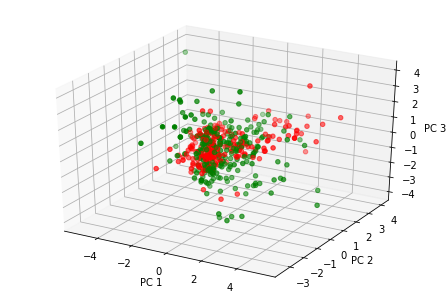

In [44]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green']
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2],c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

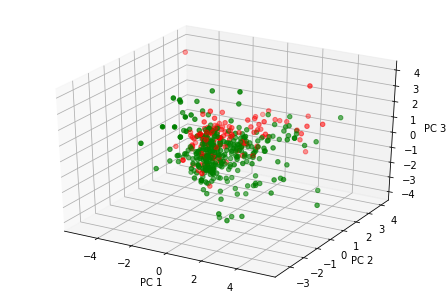

In [46]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green']
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2],c=y_pred_train, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

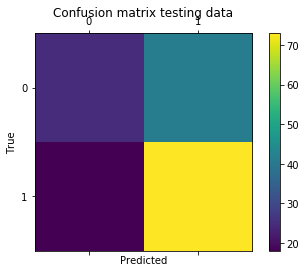

In [47]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
labels = list(range(3))
#print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix testing data')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=2,init= 'random',random_state=0).fit(scaled_X)
labels_pre=kmeans.labels_
accuracy = accuracy_score(labels_pre,cat)
accuracy

0.4864

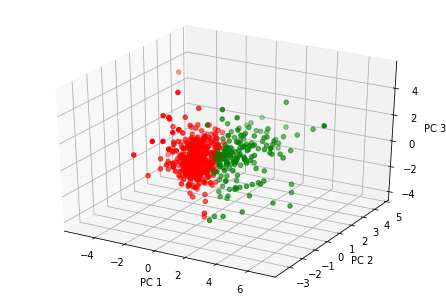

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green']
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2],c=labels_pre, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage="ward").fit(scaled_X)
labels_pre=clustering.labels_

for i in range(len(labels_pre)):
    if labels_pre[i] == 1:
        labels_pre[i] = 0
    else:
        labels_pre[i] = 1
accuracy = accuracy_score(labels_pre,cat)
accuracy

0.5424

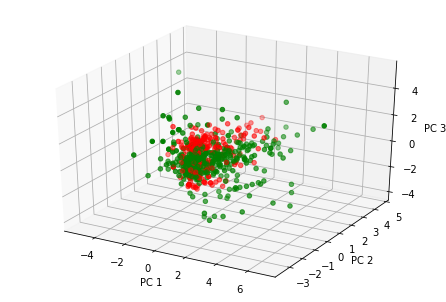

In [40]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green']
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2],c=labels_pre, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

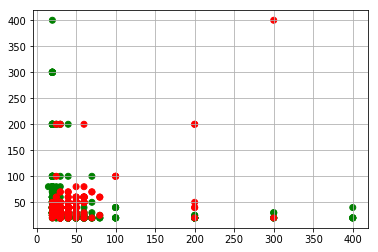

In [22]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(data_final.values[:,11], data_final.values[:,12],c=cat, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()